La Min Oo
6540039

Step 1

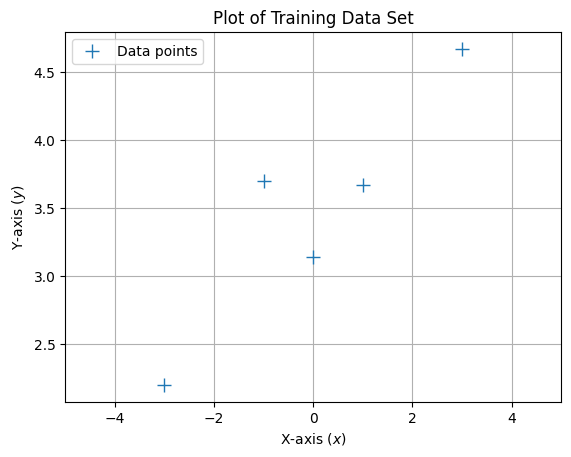

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
X = np.array([-3, -1, 0.0, 1, 3]).reshape(-1, 1)
y = np.array([2.2, 3.7, 3.14, 3.67, 4.67]).reshape(-1, 1)
plt.figure()
plt.plot(X, y, '+', markersize=10, label='Data points')
plt.xlabel("X-axis ($x$)")
plt.ylabel("Y-axis ($y$)")
plt.title("Plot of Training Data Set")
plt.xlim([-5, 5])
plt.legend()
plt.grid(True)
plt.show()

Step 2

In [10]:
# Define the maximum likelihood estimation function for calculating theta
def max_lik_estimate(X, y):
    # Calculate the inverse of X transposed times X
    inverse_term = np.linalg.inv(X.T @ X)
    # Multiply the inverse by X transposed, and then by y to compute theta maximum likelihood
    theta_ml = inverse_term @ (X.T @ y)
    return theta_ml
# Calculate theta using the training data
theta_ml = max_lik_estimate(X, y)
print("Theta:", theta_ml)

Theta: [[0.369]]


Step 3

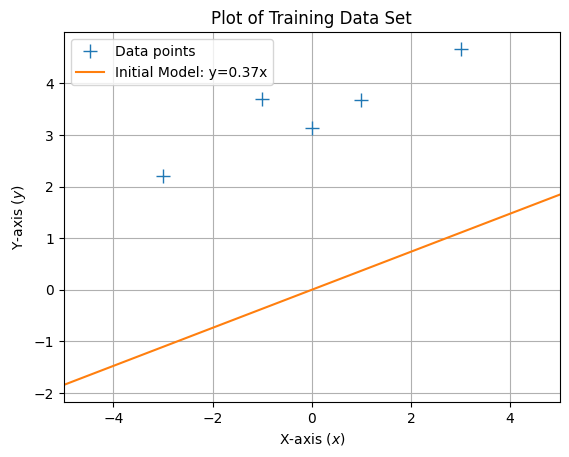

In [17]:
def predict_with_estimate(Xtest, theta):
    # Return predictions as dot product of test inputs and theta
    prediction = Xtest @ theta
    return prediction
Xtest = np.linspace(-5, 5, 100).reshape(-1,1)
ml_prediction = predict_with_estimate(Xtest, theta_ml)
plt.figure()
plt.plot(X, y, '+', markersize=10, label='Data points')
plt.plot(Xtest, ml_prediction, label=f'Initial Model: y={theta_ml[0][0]:.2f}x')
plt.xlabel("X-axis ($x$)")
plt.ylabel("Y-axis ($y$)")
plt.title("Plot of Training Data Set")
plt.xlim([-5, 5])
plt.legend()
plt.grid(True)
plt.show()


Step 4

In [21]:
print("="*10)
N, D = X.shape
X_aug = np.concatenate((np.ones((N, 1)), X), axis=1)
print("X_aug = ")
print(X_aug)
print("="*10)
# Recalculation
def max_lik_estimate_with_bias(X_aug, y):
    # Calculate the inverse of X_aug transposed times X_aug
    inverse_term = np.linalg.inv(X_aug.T @ X_aug)
    # Multiply the inverse by X_aug transposed, and then by y to compute theta maximum likelihood
    theta_ml_bias = inverse_term @ (X_aug.T @ y)
    return theta_ml_bias

theta_ml_bias = max_lik_estimate_with_bias(X_aug, y)
print("Theta with bias term (Two Values):", theta_ml_bias)


X_aug = 
[[ 1. -3.]
 [ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  3.]]
Theta with bias term (Two Values): [[3.476]
 [0.369]]


Without the bias term, we simply assume b=0 in y= mx+b.That makes the theta has only one values. In the bias term, we have to adjust with the data and will shift vertically. That makes we got non-zero intercept(b) and got two values.

Step 5

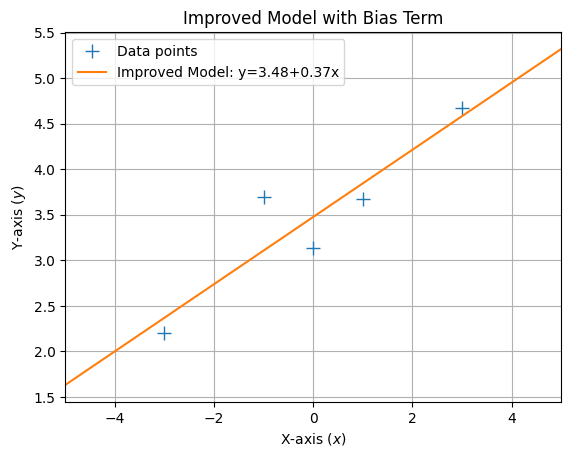

In [20]:
Xtest_aug = np.concatenate((np.ones((Xtest.shape[0], 1)), Xtest), axis=1)
ml_prediction_bias = predict_with_estimate(Xtest_aug, theta_ml_bias)

plt.figure()
plt.plot(X, y, '+', markersize=10, label='Data points')
plt.plot(Xtest, ml_prediction_bias, label=f'Improved Model: y={theta_ml_bias[0][0]:.2f}+{theta_ml_bias[1][0]:.2f}x')
plt.xlabel("X-axis ($x$)")
plt.ylabel("Y-axis ($y$)")
plt.title("Plot of Training Data Set")
plt.xlim([-5, 5])
plt.legend()
plt.grid(True)
plt.show()


In a linear equation,our model goes through the origin (0, 0). By adding a column of ones allows the model to have a non-zero y-intercept. This gives the model flexible to fit the data .In Step 4 (bias term) , we coded the model to learn both the slope and the intercept.As a result,subsequent recalculation improves the fit of the model to the data.